# Self-Case Study -1: 
EDA on the Loan Defaulter dataset for checking the loan defaulter.

 <h2>A)	ML formulation:</h2>
In this case study we can use the supervised learning model with binary classification as we have to identify whether the customer is defaulter or not.

<h2>B)	 Business Objectives and constraints:</h2>

<b>a)	Objectives:</b>

•	The main objective is to identify the potential Defaulters based on the given data about the applicants.

•	The probability of classification is essential because we want to be very sure when we classify someone as a Non-Defaulter, as the cost of making a mistake can be very high to the company.

<b>b)	Constraints:</b>

•	Interpretability is partially important for classifying someone as a Defaulter or not.

•	No strict latency constraint, as the objective is more about making the right decision rather than a quick decision. It would be fine and acceptable if the model takes few seconds to make a prediction.

•	The cost of making an error can be very high. This is due to the large amounts of funds associated with each loan. We do not want the model to miss out on potential defaulters which could incur huge financial losses to the organization.

<h2>C)	Data set analysis:</h2>

Here we have the three-csv file:

1) Application data: In this file we have the applicant’s data. It contains the total 122 columns and 307511 rows.

2) Column’s description: It will give the detail of all the 159 features.

3) Previous Application: In this file we have the applicant data which is already applied previously applied for the loan. 

It contains the total 37 columns and 1670214 rows.

<h2>D)	Performance Matrix:</h2>

1)	When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

2) To avoid the default we need to predit the defaulter properly so there may be two condition with which we have to deal with:

A} Where we predict the non-defaulter as defaulter--> This condition is fine we will further assign that cases to the business team for the reverification. If applicant is genuine then we can proceed his application.

B} Where we predict the defaulter as non-defaulter--> we need this as minimum as possible beacuse this loss to our business.

So,to acheive this we need the high recall score.

4)	To findout the percentage between the defaulter and non-defaulter we will use the AUC score. More the AUC larger the possibility to distinguied between the defaulter and non-defaulter.

5)	Accuracy score but first we need to balance the dataset. 






In [1]:
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import nltk
import itertools
import matplotlib.style as style
from mpl_toolkits.mplot3d import Axes3D
import os # accessing directory structure
import plotly
import plotly.express as px
# graphs to be inline
%matplotlib inline
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

import pickle
from tqdm import tqdm
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import time

import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics._classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
warnings.filterwarnings("ignore")
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D
from scipy.stats import uniform
import random
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
loan_process_df=pd.read_csv('/content/drive/MyDrive/Loan Defaulter/loan_process_df_StandardScaler_onehot.csv')

In [3]:
loan_process_df.drop(labels='SK_ID_CURR',axis=1,inplace=True)

In [4]:
loan_process_df['TARGET'].value_counts()

0    1021266
1     101532
Name: TARGET, dtype: int64

In [5]:
y = loan_process_df['TARGET'].values
X = loan_process_df.drop(['TARGET'], axis=1)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122798 entries, 0 to 1122797
Columns: 205 entries, NAME_CONTRACT_TYPE_x_Cash loans to YEAR_TERMINATION
dtypes: float64(205)
memory usage: 1.7 GB


We have imported the csv file now we will perform the Train-Test split for the further analysis.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

We will check the basic data with the Logistic regression model

In [8]:
log_reg=LogisticRegression(penalty='l2',C=0.0001,n_jobs=-1)
log_reg.fit(X_train,y_train)

LogisticRegression(C=0.0001, n_jobs=-1)

In [9]:
log_reg.score(X_test,y_test)

0.9096360829527912

In [10]:
from sklearn.metrics import recall_score,roc_auc_score,f1_score,auc,precision_score
recall_LR_1=recall_score(y_test,log_reg.predict(X_test))
auc_LR_1= roc_auc_score(y_test,log_reg.predict_proba(X_test)[:,1])
print(recall_LR_1)
print(auc_LR_1)

0.0016116516444815855
0.7346654601021624


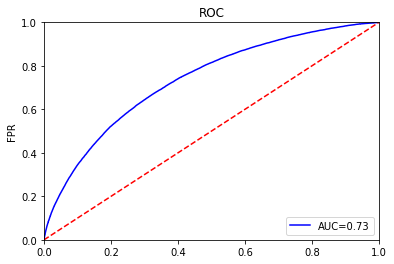

In [11]:
probs=log_reg.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,thresh=roc_curve(y_test,preds)
roc_auc_LR_1= auc(fpr,tpr)
plt.title("ROC")
plt.plot(fpr,tpr,'b',label='AUC=%0.2f'%roc_auc_LR_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.ylabel('FPR')
plt.show()

From this result, we have observed that our baseline model will show very high accuracy and an AUC of 0.73 but very low recall value.

So, now we will check whether the dimentionality reduction with PCA will help to improve the recall value or not.

# <font color='red'>**PCA**

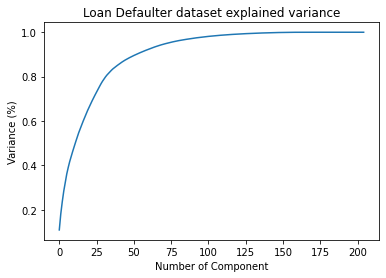

In [12]:
from sklearn.decomposition import PCA
pca=PCA()
pca_train=pca.fit_transform(X_train)
pca_test=pca.fit_transform(X_test)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Component')
plt.ylabel('Variance (%)')
plt.title('Loan Defaulter dataset explained variance')
plt.show()

The graph shows that the 150 features will preserved the 95% variance of the data.  

Now we will try to apply the PCA and check the recall value for our baseline model

In [13]:
#The top 150 features preserved the approx 95% variance of the data
pca=PCA(n_components=150)
pca_train=pca.fit_transform(X_train)
pca_test=pca.fit_transform(X_test)
log_reg=LogisticRegression(penalty='l2',C=0.001,n_jobs=-1)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)
recall=recall_score(y_test,log_reg.predict(X_test))
print(recall)

0.011759087924550826


Still we have the very less recall value it is due to we are missing some important feature. So, now we will try with some other apporoach

In [14]:
X_train.shape

(504023, 205)

In [15]:
y_train.shape

(504023,)

In [16]:
np.unique(y_train)

array([0, 1])

In [17]:
Train_mer=np.concatenate((np.array(X_train),np.array(y_train).reshape(504023,1)),axis=1)

As we have the large amount of data, we will apply the undesampling here.Oversampling may lead to overfitting.

In [18]:
from sklearn.utils import resample

majority =Train_mer[Train_mer[:,-1]==0]
minority =Train_mer[Train_mer[:,-1]==1]

downsample =resample(majority,replace=False,n_samples=minority.shape[0])
X_train_new =np.concatenate([downsample,minority])

In [19]:
y_train_new =X_train_new[:,-1]
X_train_new =X_train_new[:,:-1]

In [20]:
features =loan_process_df.columns[loan_process_df.columns!='TARGET']
X_train_new=pd.DataFrame(X_train_new,columns=features)

Now we will check our baseline model with the new train value dataset

In [21]:
log_reg=LogisticRegression(penalty='l2',C=0.001,n_jobs=-1)
log_reg.fit(X_train_new,y_train_new)
log_reg.score(X_test,y_test)

0.6837910634668739

In [34]:
Accuracy_LR=log_reg.score(X_test,y_test)
print("Accuracy_LR: ",Accuracy_LR)

Accuracy_LR:  0.6837910634668739


In [35]:
from sklearn.metrics import recall_score,roc_auc_score,auc
recall_LR=recall_score(y_test,log_reg.predict(X_test))
auc_LR= roc_auc_score(y_test,log_reg.predict_proba(X_test)[:,1])

print("recall_LR: ",recall_LR)
print("auc_LR: ",auc_LR)

recall_LR:  0.6669850176087865
auc_LR:  0.7385025374091879


Undesampling is working fine as the recall value is increases drastically. So, now we will check other model too to observed how they perform and also is they help us to improve the recall value further.

<h3><b><font color='red'>Prefer Parameter for the Hyper parameter tunning:</h3></font></b>

<b>1) learning_rate</b>

<b>2) N_estimators</b>

<b>3) max_depth</b>

<b>4) min_samples_split</b>

<b>5) min_samples_leaf</b>

<b>6) max_features</b>

In [24]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [25]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [26]:
#plot Variable importances
def plot_fi(df):
   #sort variables of importance in descending order
   df=df.sort_values('importance',ascending=False).reset_index()
   #Normalize the feature importances of easier explanability
   df['importance_normalized']=df['importance']/df['importance'].sum()
   plt.figure(figsize=(8,6))
   ax=plt.subplot()
   #Select the top 10 features
   ax.barh(list(reversed(list(df.index[:10]))),df['importance_normalized'].head(10),color='r',align='center')
   #set the yticks and labels
   ax.set_yticks(list(reversed(list(df.index[:10]))))
   ax.set_yticklabels(df['feature'].head(10))
   plt.xlabel('Normalized Importance')
   plt.title('Feature Importance')
   plt.show()

# Model 1: GBDT

<b><h2><font color='green'>1) learning_rate</b></h2></font>

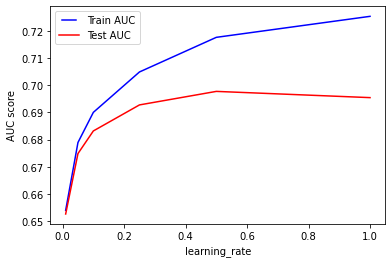

In [ ]:
from sklearn.metrics import recall_score,roc_auc_score,f1_score,auc,precision_score
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
train_results = []
test_results = []
for rate in learning_rate:
   model = GradientBoostingClassifier(learning_rate=rate)
   model.fit(X_train_new,y_train_new)   
   train_pred = model.predict(X_train_new)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_new, train_pred)
   roc_auc_1 = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc_1)   
   y_pred = model.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc_2 = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc_2)


line1, = plt.plot(learning_rate, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rate, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning_rate')
plt.show()

<b><h2><font color='green'>2) N_estimators</b></h2></font>

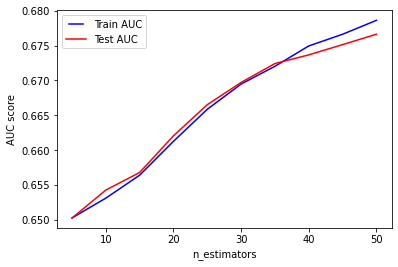

In [ ]:
n_estimators = [5,10,15,20,25,30,35,40,45,50]
train_results = []
test_results = []
for estimator in n_estimators:
   model = GradientBoostingClassifier(n_estimators=estimator)
   model.fit(X_train_new,y_train_new)   
   train_pred = model.predict(X_train_new)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_new, train_pred)
   roc_auc_4 = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc_4)   
   y_pred = model.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc_5 = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc_5)


line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

In [36]:
!pip3 install scikit-learn==1.0 -U

     |████████████████████████████████| 23.1 MB 6.8 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


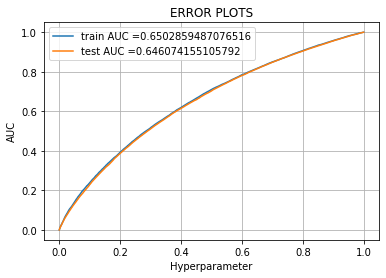

In [37]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from imblearn.ensemble import BalancedBaggingClassifier
best_learning_rate = 0.1
best_n_estimators = 15
best_max_depth = 5

#Create an object of the classifier.
#neigh = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(learning_rate=best_learning_rate, n_estimators=best_n_estimators,max_features=best_max_depth),sampling_strategy='auto',replacement=False,random_state=0)

neigh = GradientBoostingClassifier(learning_rate=best_learning_rate, n_estimators=best_n_estimators,max_features=best_max_depth)
neigh.fit(X_train_new,y_train_new)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_new)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
Auc_TFIDF=auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
feature_importance = neigh.feature_importances_
df_GBDT=pd.DataFrame({'feature':features,'importance':feature_importance})

the maximum value of tpr*(1-fpr) 0.37400357805162565 for threshold 0.501


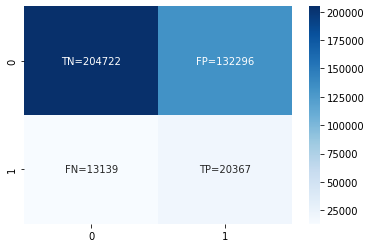

In [ ]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
#group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_counts = [value for value in cm.flatten()]

labels = [f"{v1}={v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues')

for i in range(len(group_counts)):    
    TN=group_counts[0]
    TP=group_counts[3]
    FN=group_counts[2]
    FP=group_counts[1]

In [38]:
from sklearn.metrics import recall_score,roc_auc_score,auc

Accuracy_GBDT= neigh.score(X_test,y_test)
recall_GBDT= recall_score(y_test,neigh.predict(X_test))
auc_GBDT= roc_auc_score(y_test,neigh.predict_proba(X_test)[:,1])

print("Accuracy_GBDT: ",Accuracy_GBDT)
print("recall_GBDT: ",recall_GBDT)
print("auc_GBDT: ",auc_GBDT)

Accuracy_GBDT:  0.6033482311537174
recall_GBDT:  0.6126066973079448
auc_GBDT:  0.646074155105792


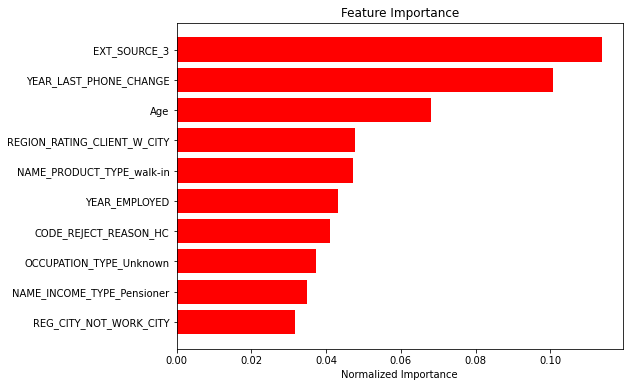

In [ ]:
plot_fi(df_GBDT)

# Model-2: RF

<b><h2><font color='green'>N_estimators</b></h2></font>

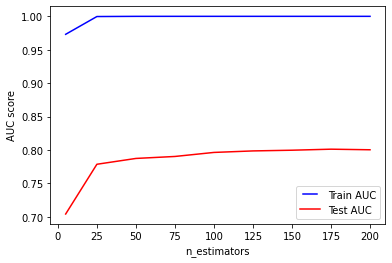

In [ ]:
n_estimators = [5,25,50,75,100,125,150,175,200]
train_results = []
test_results = []
for estimator in n_estimators:
   model = RandomForestClassifier(n_estimators=estimator)
   model.fit(X_train_new,y_train_new)   
   train_pred = model.predict(X_train_new)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_new, train_pred)
   roc_auc_89 = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc_89)   
   y_pred = model.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc_90 = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc_90)


line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

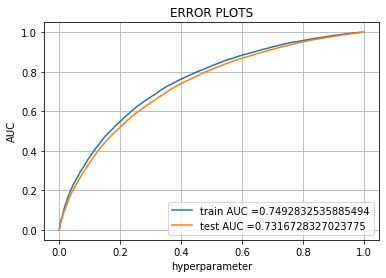

In [39]:
best_depth1 = 7
best_n_estimators1 = 100
neigh = RandomForestClassifier(bootstrap=True, class_weight="balanced_subsample", criterion='gini',random_state=25,n_jobs=-1,max_depth=best_depth1,n_estimators=best_n_estimators1)
neigh.fit(X_train_new,y_train_new)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = batch_predict(neigh, X_train_new)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
Auc_TFIDF=auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [ ]:
feature_importance = neigh.feature_importances_
df_RF=pd.DataFrame({'feature':features,'importance':feature_importance})

the maximum value of tpr*(1-fpr) 0.47198868583862363 for threshold 0.497


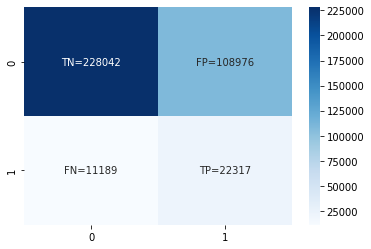

In [ ]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
#group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_counts = [value for value in cm.flatten()]

labels = [f"{v1}={v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues')

for i in range(len(group_counts)):    
    TN=group_counts[0]
    TP=group_counts[3]
    FN=group_counts[2]
    FP=group_counts[1]

In [40]:
from sklearn.metrics import recall_score,roc_auc_score,auc

Accuracy_RF= neigh.score(X_test,y_test)
recall_RF= recall_score(y_test,neigh.predict(X_test))
auc_RF= roc_auc_score(y_test,neigh.predict_proba(X_test)[:,1])

print("Accuracy_RF: ",Accuracy_RF)
print("recall_RF: ",recall_RF)
print("auc_RF: ",auc_RF)

Accuracy_RF:  0.6723019291597845
recall_RF:  0.6722079627529398
auc_RF:  0.7316728327023775


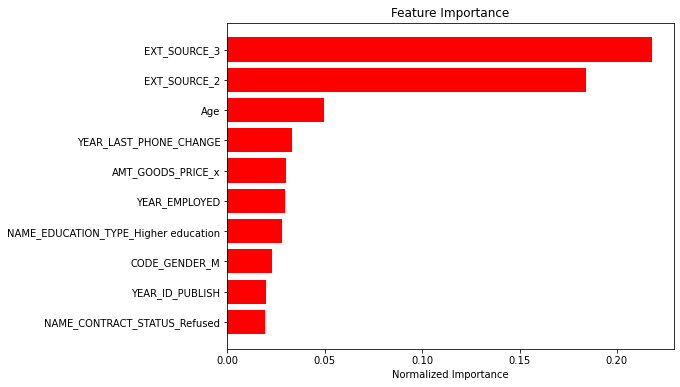

In [ ]:
plot_fi(df_RF)

# Model-3: K-NN

<b><h2><font color='green'>1) n_neighbors</b></h2></font>

In [ ]:
n_neighbors = [1,3,6,9,12]
train_results = []
test_results = []
for estimator in n_neighbors:
   model = KNeighborsClassifier(n_neighbors=estimator,n_jobs=-1)
   model.fit(X_train_new,y_train_new)   
   train_pred = model.predict(X_train_new)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_new, train_pred)
   roc_auc_KNN1 = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc_KNN1)   
   y_pred = model.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc_KNN2 = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc_KNN2)


line1, = plt.plot(n_neighbors, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_neighbors, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_neighbors')
plt.show()

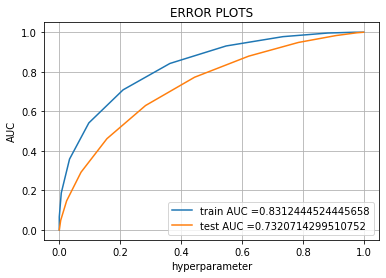

In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

best_NN=10
neigh = KNeighborsClassifier(n_neighbors=best_NN)
neigh.fit(X_train_new,y_train_new)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_new)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
Auc_KNN=auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.5618591906234321 for threshold 0.6


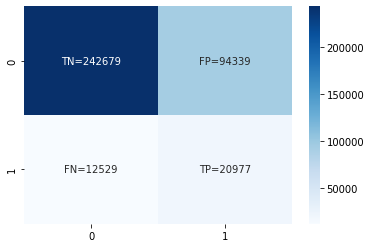

In [29]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
#group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_counts = [value for value in cm.flatten()]

labels = [f"{v1}={v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues')

for i in range(len(group_counts)):    
    TN=group_counts[0]
    TP=group_counts[3]
    FN=group_counts[2]
    FP=group_counts[1]

In [42]:
from sklearn.metrics import recall_score,roc_auc_score,auc

Accuracy_KNN= neigh.score(X_test,y_test)
recall_KNN= recall_score(y_test,neigh.predict(X_test))
auc_KNN= roc_auc_score(y_test,neigh.predict_proba(X_test)[:,1])

print("Accuracy_KNN: ",Accuracy_KNN)
print("recall_KNN: ",recall_KNN)
print("auc_KNN: ",auc_KNN)

Accuracy_KNN:  0.7086747417171357
recall_KNN:  0.6293201217692354
auc_KNN:  0.7320714299510752


# Model-4: SVM

<b><h2><font color='green'>1) alpha</b></h2></font>

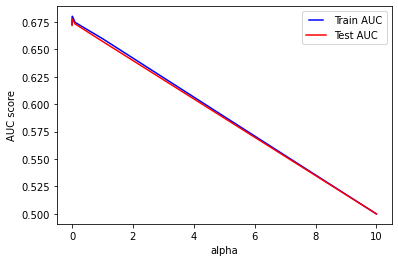

In [27]:
alpha = [0.0001,0.001,0.01,0.1,1,10]
train_results = []
test_results = []
for i in alpha:
   model = SGDClassifier(loss='hinge',alpha=i,n_jobs=-1,class_weight='balanced')
   model.fit(X_train_new,y_train_new)   
   train_pred = model.predict(X_train_new)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_new, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)   
   y_pred = model.predict(X_test)   
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)


line1, = plt.plot(alpha, train_results, 'b', label="Train AUC")
line2, = plt.plot(alpha, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('alpha')
plt.show()

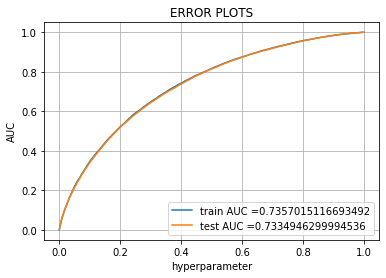

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve

best_alpha=0.1
neigh = SGDClassifier(alpha=best_alpha,n_jobs=-1)
neigh.fit(X_train_new,y_train_new)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
neigh = CalibratedClassifierCV(neigh, cv='prefit')
neigh=neigh.fit(X_train_new, y_train_new)

y_train_pred = batch_predict(neigh, X_train_new)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
Auc_KNN=auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.45572260005416 for threshold 0.493


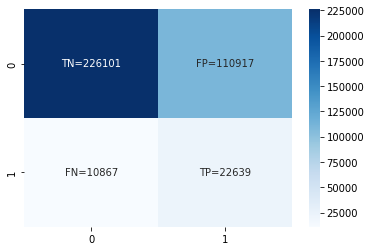

In [36]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
#group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_counts = [value for value in cm.flatten()]

labels = [f"{v1}={v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues')

for i in range(len(group_counts)):    
    TN=group_counts[0]
    TP=group_counts[3]
    FN=group_counts[2]
    FP=group_counts[1]

In [44]:
from sklearn.metrics import recall_score,roc_auc_score,auc

Accuracy_SVM= neigh.score(X_test,y_test)
recall_SVM= recall_score(y_test,neigh.predict(X_test))
auc_SVM= roc_auc_score(y_test,neigh.predict_proba(X_test)[:,1])

print("Accuracy_SVM: ",Accuracy_SVM)
print("recall_SVM: ",recall_SVM)
print("auc_SVM: ",auc_SVM)

Accuracy_SVM:  0.6819099437553303
recall_SVM:  0.6595833582045006
auc_SVM:  0.7334946299994536


#<font color='red'> **Decision Tree**

In [27]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

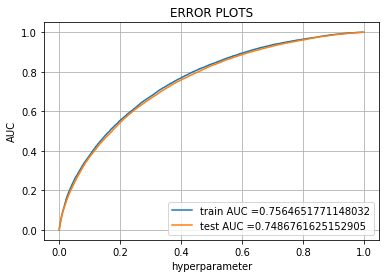

In [28]:
neigh = XGBClassifier()
neigh.fit(X_train_new,y_train_new)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(neigh, X_train_new)    
y_test_pred = batch_predict(neigh, X_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_new, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
Auc_KNN=auc(test_fpr, test_tpr)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [29]:
feature_importance = neigh.feature_importances_
df_XGB=pd.DataFrame({'feature':features,'importance':feature_importance})

the maximum value of tpr*(1-fpr) 0.47467667295958377 for threshold 0.488


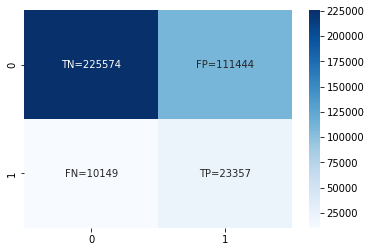

In [30]:
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['TN','FP','FN','TP']
#group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_counts = [value for value in cm.flatten()]

labels = [f"{v1}={v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels,fmt="",cmap='Blues')

for i in range(len(group_counts)):    
    TN=group_counts[0]
    TP=group_counts[3]
    FN=group_counts[2]
    FP=group_counts[1]

In [31]:
from sklearn.metrics import recall_score,roc_auc_score,auc

Accuracy_XGB= neigh.score(X_test,y_test)
recall_XGB= recall_score(y_test,neigh.predict(X_test))
auc_XGB= roc_auc_score(y_test,neigh.predict_proba(X_test)[:,1])

print("Accuracy_XGB: ",Accuracy_XGB)
print("recall_XGB: ",recall_XGB)
print("auc_XGB: ",auc_XGB)

Accuracy_XGB:  0.6876504625881185
recall_XGB:  0.67620724646332
auc_XGB:  0.7486761625152905


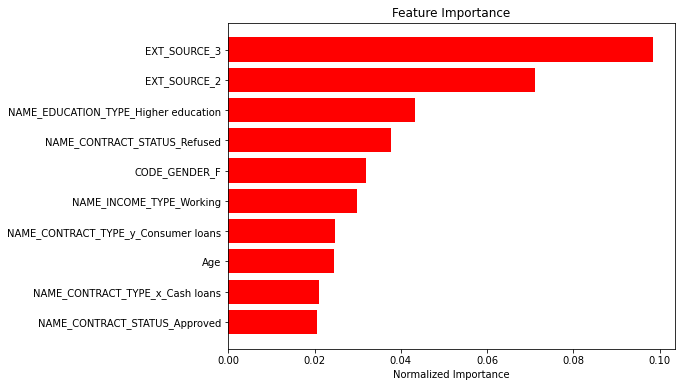

In [33]:
plot_fi(df_XGB)

# Summary

In [46]:
from prettytable import PrettyTable
x = PrettyTable()
  
x.field_names = ["Model","Accuracy","Recall","AUC"]
x.add_row(["GBDT", Accuracy_GBDT,recall_GBDT,auc_GBDT])
x.add_row(["RF", Accuracy_RF,recall_RF,auc_RF])
x.add_row(["KNN",Accuracy_KNN,recall_KNN,auc_KNN])
x.add_row(["SVM",Accuracy_SVM,recall_SVM,auc_SVM])
x.add_row(["LR",Accuracy_LR,recall_LR,auc_LR])
x.add_row(["XGBoost",Accuracy_XGB,recall_XGB,auc_XGB])
print(x)

+---------+--------------------+--------------------+--------------------+
|  Model  |      Accuracy      |       Recall       |        AUC         |
+---------+--------------------+--------------------+--------------------+
|   GBDT  | 0.6033482311537174 | 0.6126066973079448 | 0.646074155105792  |
|    RF   | 0.6723019291597845 | 0.6722079627529398 | 0.7316728327023775 |
|   KNN   | 0.7086747417171357 | 0.6293201217692354 | 0.7320714299510752 |
|   SVM   | 0.6819099437553303 | 0.6595833582045006 | 0.7334946299994536 |
|    LR   | 0.6837910634668739 | 0.6669850176087865 | 0.7385025374091879 |
| XGBoost | 0.6876504625881185 |  0.67620724646332  | 0.7486761625152905 |
+---------+--------------------+--------------------+--------------------+


<b><h2>As per the above mentioned result <font color='red'>Random forset </font>and <font color='red'>XGBoost model </font> will have the highest recall and AUC value as compare to the other model. </b></h2>